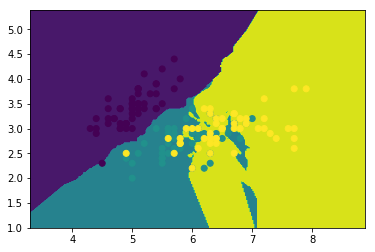

0.78947368421052633

In [3]:
from sklearn import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x_data = iris.data[:, :2]
y_data = iris.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

def plot(model):
    x_min, x_max = x_data[:, 0].min() -1, x_data[:, 0].max()+1
    y_min, y_max = x_data[:, 1].min() -1, x_data[:, 1].max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z)
    
# 画图
plot(knn)

# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

#准确率
knn.score(x_test, y_test)


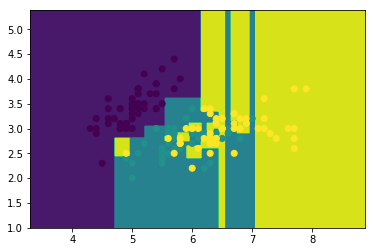

0.84210526315789469

In [5]:
# 决策树
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

plot(dtree)
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()
dtree.score(x_test, y_test)


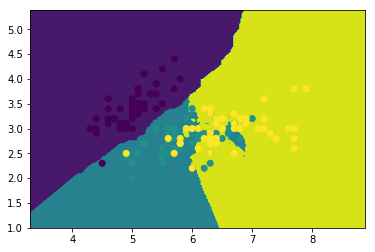

0.81578947368421051

In [6]:
bagging_knn = BaggingClassifier(knn, n_estimators=100)
bagging_knn.fit(x_train, y_train)
plot(bagging_knn)
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()
bagging_knn.score(x_test, y_test)


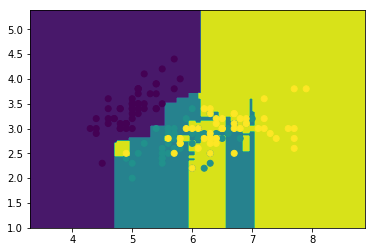

0.73684210526315785

In [7]:
bagging_dtree = BaggingClassifier(dtree, n_estimators=100)
bagging_dtree.fit(x_train, y_train)
plot(bagging_dtree)
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()
bagging_dtree.score(x_test, y_test)
